Desenvolvido por Gabriel Albertin dos Santos

Utilizando o Google Colab


#Importação e criação da classe Município.
Os atributos da classe estão de acordo com os dados do arquivo disponibilizado pelo IBGE.


Fonte do arquivo: https://www.ibge.gov.br/cidades-e-estados/sp

In [59]:
import matplotlib.pyplot as plt

In [26]:
class Municipio():
  def __init__(self):
    self.nome = ""
    self.cod = 0
    self.gentilico = ""
    self.prefeito = ""
    self.area = 0.0
    self.populacao = 0
    self.den_demografica = 0.0
    self.indice = 0.0
    self.mortalidade = 0.0
    self.escolaridade = 0.0
    self.idhm = 0.0
    self.receita = 0.0
    self.despesas = 0.0
    self.pib = 0.0

#Leitura do arquivo para a criação do Reduce.

In [46]:
def map(nome_arquivo):
  arq = open(nome_arquivo,"r",encoding="ISO-8859-1")
  municipios = {}
  tamanho = arq.readlines()
  count = 1

  while (len(tamanho) > count):
    municipio = Municipio()
    linha = tamanho[count]
    dados = linha.split(";")

    if(dados[0] == ""):
      break;
    municipio.nome = dados[0]
    municipio.cod = float(dados[1].replace(",", "."))
    municipio.gentilico = dados[2]
    municipio.prefeito = dados[3]
    municipio.area = float(dados[4].replace(",", "."))
    municipio.populacao = float(dados[5].replace(",", "."))
    municipio.den_demografica = float(dados[6].replace(",", "."))
    municipio.escolaridade = float(dados[7].replace(",", "."))
    municipio.indice = float(dados[8].replace(",", "."))
    if(dados[9] == "-"):
      municipio.mortalidade = 0.0
    else:
      municipio.mortalidade = float(dados[9].replace(",", "."))
    municipio.receita = float(dados[10].replace(",", "."))
    municipio.despesas = float(dados[11].replace(",", "."))
    municipio.pib = float(dados[12].replace(",", "."))

    municipios[municipio.nome] = municipio
    count += 1

  return municipios

municipios = map("/content/MunicipiosSP.csv")

#Atividade 1 - Liste as 10 cidades com maior nivel de escolaridade de 6 a 14 anos;


In [96]:
def reduce_map_escolaridade(mapa):
  reduce_map = {}
  cidades_ordenadas = sorted(mapa.items(), key=lambda x: x[1].escolaridade, reverse=True)
  for nome, municipio in cidades_ordenadas[:10]:
    reduce_map[nome] = municipio.escolaridade
  return reduce_map


reduce_escolaridade = reduce_map_escolaridade(municipios)

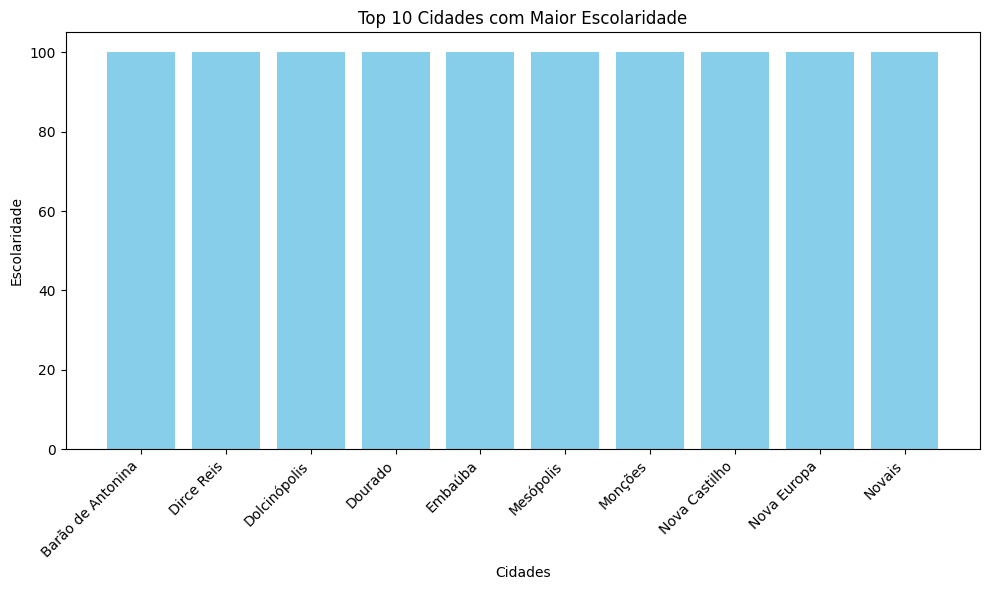

In [97]:
nomes_cidades = list(reduce_escolaridade.keys())
escolaridades = list(reduce_escolaridade.values())

plt.figure(figsize=(10, 6))
plt.bar(nomes_cidades, escolaridades, color='skyblue')
plt.xlabel('Cidades')
plt.ylabel('Escolaridade')
plt.title('Top 10 Cidades com Maior Escolaridade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

#Atividade 2 - Exiba as 5 cidades com o maior PIB;

In [93]:
def reduce_map_cidades_pib(mapa):
  reduce_map = {}
  cidades_ordenadas = sorted(mapa.items(), key=lambda x: x[1].pib, reverse=True)
  for nome, municipio in cidades_ordenadas[:5]:
    reduce_map[nome] = municipio.pib
  return reduce_map


reduce_pib = reduce_map_cidades_pib(municipios)

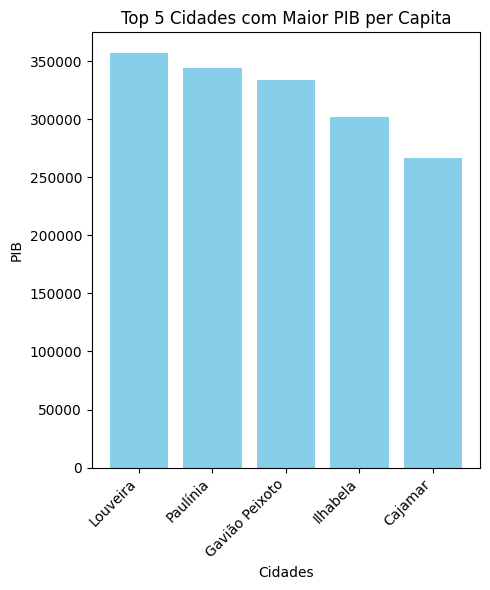

In [94]:
nomes_cidades = list(reduce_pib.keys())
pib = list(reduce_pib.values())

plt.figure(figsize=(5, 6))
plt.bar(nomes_cidades, pib, color='skyblue')
plt.xlabel('Cidades')
plt.ylabel('PIB')
plt.title('Top 5 Cidades com Maior PIB per Capita')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

#Atividade 3 - As 10 cidades com o índice de maior mortalidade Infantil;

In [90]:
def reduce_map_cidades_mortalidade(mapa):
  reduce_map = {}
  cidades_ordenadas = sorted(mapa.items(), key=lambda x: x[1].mortalidade, reverse=True)
  for nome, municipio in cidades_ordenadas[:10]:
    reduce_map[nome] = municipio.mortalidade
  return reduce_map


reduce_mortalidade = reduce_map_cidades_mortalidade(municipios)

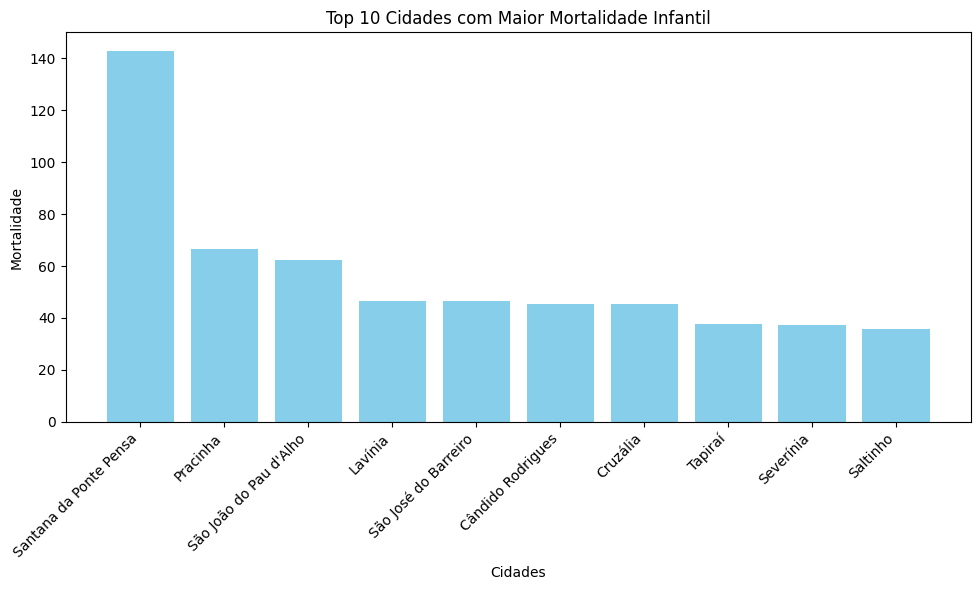

In [91]:
nomes_cidades = list(reduce_mortalidade.keys())
mortalidade = list(reduce_mortalidade.values())

plt.figure(figsize=(10, 6))
plt.bar(nomes_cidades, mortalidade, color='skyblue')
plt.xlabel('Cidades')
plt.ylabel('Mortalidade')
plt.title('Top 10 Cidades com Maior Mortalidade Infantil')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()